tensorflow version: 1.13.1
keras version: 2.2.4

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

Using TensorFlow backend.
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [3]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

importing dataset from Dataset_utils

In [6]:
import import_ipynb
from Dataset_utils import *

importing Jupyter notebook from Dataset_utils.ipynb


In [7]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 177s 59ms/step - loss: 0.7890 - acc: 0.5473 - val_loss: 0.6513 - val_acc: 0.6160
Epoch 2/30
3000/3000 [==============================] - 158s 53ms/step - loss: 0.6537 - acc: 0.6407 - val_loss: 0.5621 - val_acc: 0.7230
Epoch 3/30
3000/3000 [==============================] - 148s 49ms/step - loss: 0.5716 - acc: 0.7120 - val_loss: 0.6640 - val_acc: 0.6570
Epoch 4/30
3000/3000 [==============================] - 146s 49ms/step - loss: 0.4904 - acc: 0.7683 - val_loss: 0.5835 - val_acc: 0.7110
Epoch 5/30
3000/3000 [==============================] - 151s 50ms/step - loss: 0.4223 - acc: 0.8037 - val_loss: 0.6541 - val_acc: 0.6930
Epoch 6/30
3000/3000 [==============================] - 168s 56ms/step - loss: 0.3307 - acc: 0.8500 - val_loss: 0.7777 - val_acc: 0.7050
Epoch 7/30
3000/3000 [==============================] - 154s 51ms/step - loss: 0.2

import pickle
f = open('simple_cnn_model.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [1]:
import pickle
file = 'simple_cnn_model.pckl'
f = open(file, 'rb')
hist = pickle.load(f)
f.close()

In [2]:
import import_ipynb
from model_summary import *

importing Jupyter notebook from model_summary.ipynb


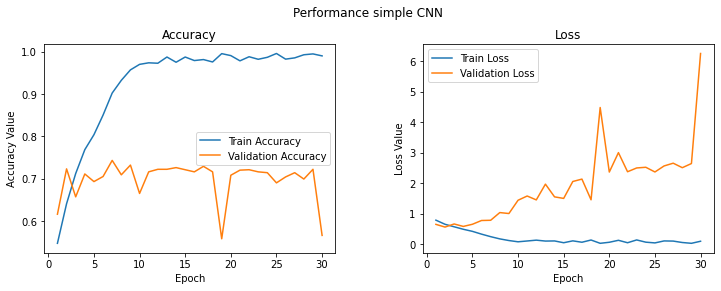

In [3]:
performance = 'Performance simple CNN'
plot_graph(performance, hist, 30)